In [2]:
import numpy as np

In [3]:
def find_eigenvalues(A):
    return np.linalg.eig(A)[0]

def find_eigenvectors(A):
    return np.linalg.eig(A)[1]

In [4]:
matrix = np.array([[1, 2], [2, 1]])
values = find_eigenvalues(matrix)
vectors = find_eigenvectors(matrix)

In [5]:
def check_eigenpair(A, value, vector):
    return np.allclose(A @ vector, value * vector) # Check if Av = λv with a tolerance!!!
    

for value, vector in zip(values, vectors.T):
    print(f"Eigenvalue: {int(value)} for eigenvector: {vector}")
    print(check_eigenpair(matrix, value, vector))
    

Eigenvalue: 3 for eigenvector: [0.70710678 0.70710678]
True
Eigenvalue: 0 for eigenvector: [-0.70710678  0.70710678]
True


In [6]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

In [7]:
image_raw = imread("abc.png")
image_rgb = image_raw[:, :, :3]
print(image_rgb.shape)
# width, height, color channels

(698, 800, 3)


In [8]:
image_sum = image_rgb.sum(axis=2)
print(image_sum.shape)
image_bw = image_sum / image_sum.max()  # Normalize to [0, 1]
print(image_bw)

(698, 800)
[[0.06405229 0.7751634  1.         ... 1.         1.         1.        ]
 [0.06405229 0.7751634  1.         ... 1.         1.         1.        ]
 [0.06405229 0.7751634  1.         ... 1.         1.         1.        ]
 ...
 [0.03006536 0.34509805 0.46928105 ... 0.38431373 0.4496732  0.475817  ]
 [0.03006536 0.41176474 0.52418303 ... 0.5019608  0.5294118  0.5294118 ]
 [0.03006536 0.43529412 0.58300656 ... 0.5294118  0.5294118  0.5294118 ]]


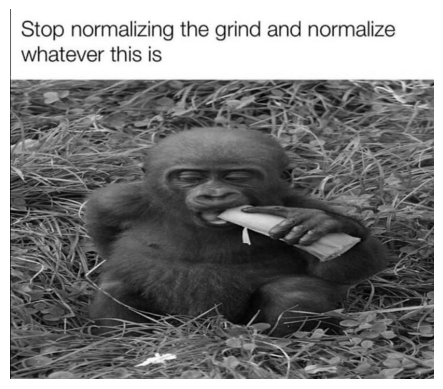

In [9]:
plt.imshow(image_bw, cmap='gray')
plt.axis('off')
plt.show()

In [29]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(image_bw) # compute the principal components

cumulative_variance = np.cumsum(pca.explained_variance_ratio_) * 100
print(len(pca.explained_variance_ratio_))

#                    returns the index of the 1st True
num_components_95 = np.argmax(cumulative_variance >= 95) + 1
print("Number of components explaining 95% variance:", num_components_95)

PCA()
698
Number of components explaining 95% variance: 42


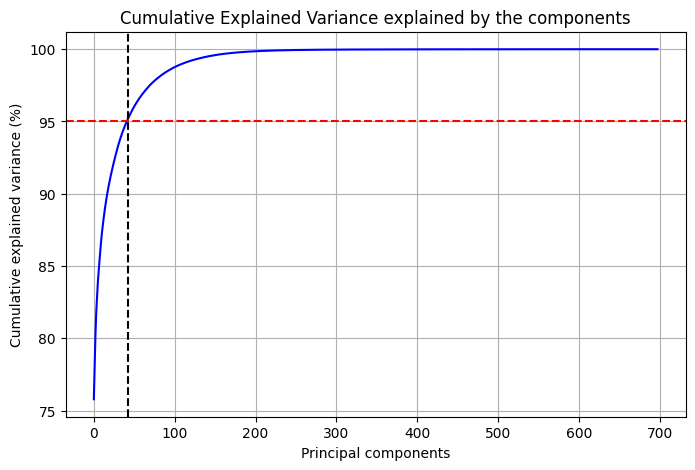

In [35]:
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, color = 'b')
# plt.plot(cumulative_variance, marker='o', linestyle='--', color='b')  # Add dots and dashed line
plt.axhline(y=95, color='r', linestyle='--')
plt.axvline(x=num_components_95, color='k', linestyle='--')
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance (%)')
plt.title('Cumulative Explained Variance explained by the components')
plt.grid()
plt.show()

So, we need 42 components to explain 95% of the variance in the image. Let's see how the image looks like with 42 components.

In [31]:
pca_42 = PCA(n_components=num_components_95)
image_bw_pca = pca_42.fit_transform(image_bw)
image_bw_pca.shape

(698, 42)

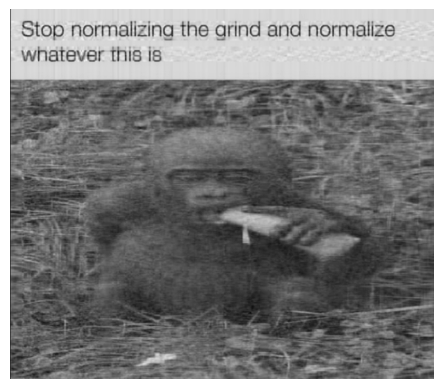

In [34]:
image_bw_reconstructed = pca_42.inverse_transform(image_bw_pca)
plt.imshow(image_bw_reconstructed, cmap='gray')
plt.axis('off')
plt.show()

In [36]:
def calculate_pca(image, num_components):
    pca = PCA(n_components=num_components)
    image_pca = pca.fit_transform(image)
    image_reconstructed = pca.inverse_transform(image_pca)
    return image_reconstructed

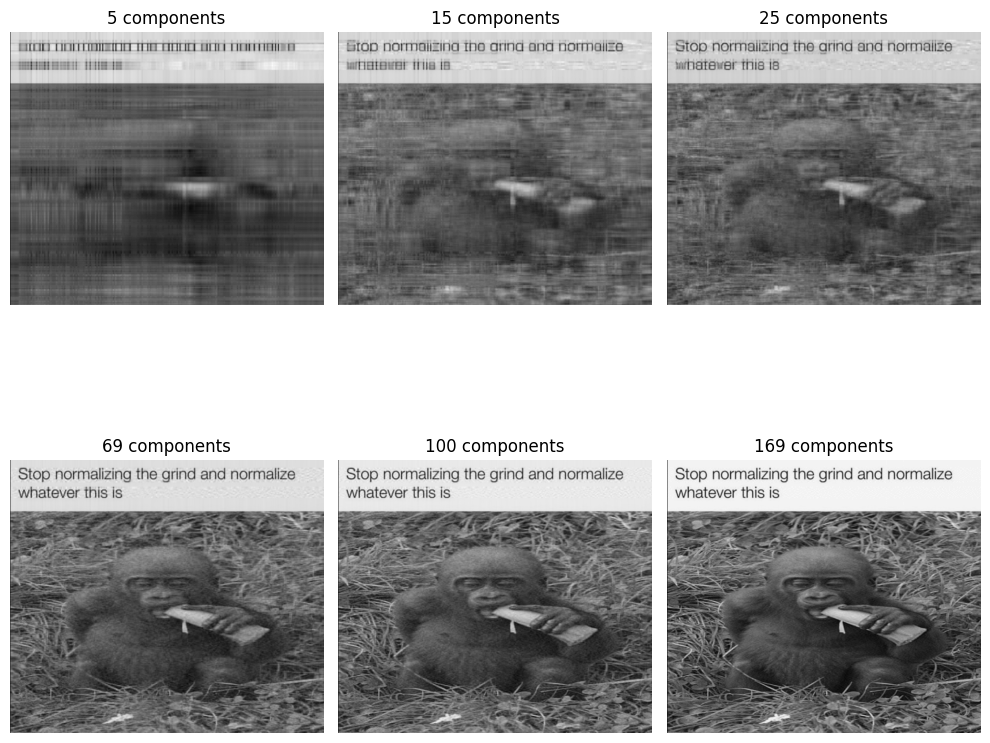

In [41]:
components_list = [5, 15, 25, 69, 100, 169]

plt.figure(figsize=(10, 10))

for i, num_components in enumerate(components_list):
    image_reconstructed = calculate_pca(image_bw, num_components)

    plt.subplot(2, 3, i + 1)
    plt.imshow(image_reconstructed, cmap='gray')
    plt.title(f'{num_components} components')
    plt.axis('off')
plt.tight_layout() # adjust spacing between plots
plt.show()